# Using Scikit-Learn's LinearRegression Model

In [118]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

In [119]:
salary_dataset = pd.read_csv('/content/Salary_dataset.csv')
salary_dataset.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


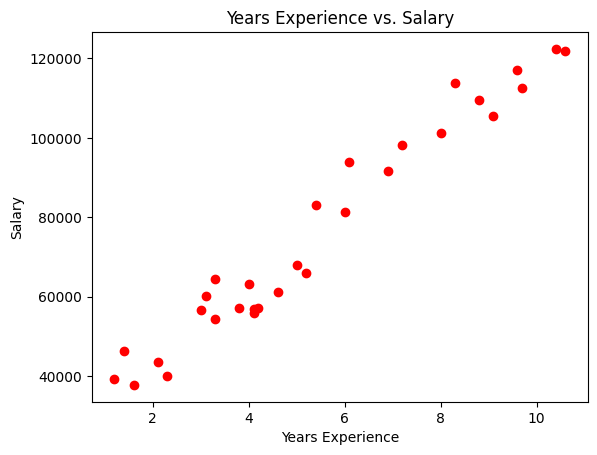

In [120]:
# Extracting the feature X and target y
X = salary_dataset.iloc[:, 1].values.reshape(-1, 1)  # Reshape for sklearn
y = salary_dataset.iloc[:, 2]

# Plotting the data
plt.scatter(X, y, marker='o', c='r')

# Set the title
plt.title("Years Experience vs. Salary")
plt.xlabel('Years Experience')
plt.ylabel('Salary')
plt.show()


In [121]:
from sklearn.preprocessing import StandardScaler

lr = LinearRegression()

# Train the model
lr.fit(X, y)

# Make predictions on the test set
y_pred = lr.predict(X)


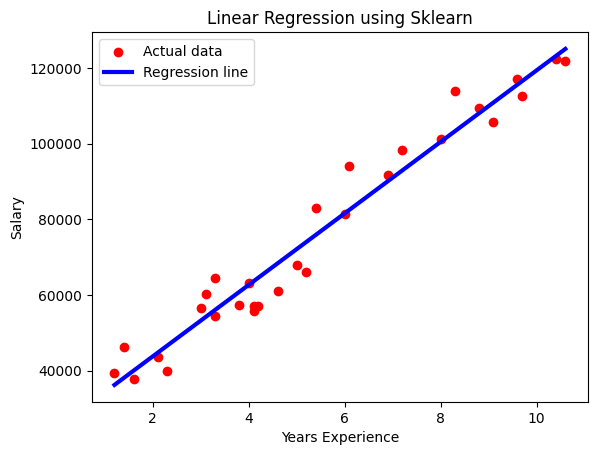

In [122]:
# Plotting the scaled data and the regression line
plt.scatter(X, y, color='red', label='Actual data')
plt.plot(X, y_pred, color='blue', linewidth=3, label='Regression line')
plt.title('Linear Regression using Sklearn')
plt.xlabel('Years Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [123]:
predict1 = lr.predict(np.array([2]).reshape(-1, 1))
print('For years experience = 2, predicted salary is ${}'.format(predict1[0]))

For years experience = 2, predicted salary is $43748.12860943335


In [124]:
[lr.coef_, lr.intercept_]
print("w: {}".format(lr.coef_[0]))
print("b: {}".format(lr.intercept_))

w: 9449.962321455077
b: 24848.203966523193


# Implementation of Linear Regression From Scratch

In [125]:
import math
import copy

In [126]:
salary_dataset = pd.read_csv('/content/Salary_dataset.csv')
salary_dataset.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [127]:
# Data extraction, X (feature) and y(target)
X = salary_dataset.iloc[:, 1].values
y = salary_dataset.iloc[:, 2].values
x_train, y_train = X, y

In [128]:
# print x_train
print("First five elements of x_train:", x_train[:5])

First five elements of x_train: [1.2 1.4 1.6 2.1 2.3]


In [129]:
# print y_train
print("First five elements of y_train:", y_train[:5])

First five elements of y_train: [39344. 46206. 37732. 43526. 39892.]


In [130]:
print ('The shape of x_train:', x_train.shape)
print ('The shape of y_train: ', y_train.shape)
print ('Number of training examples:', len(x_train))

The shape of x_train: (30,)
The shape of y_train:  (30,)
Number of training examples: 30


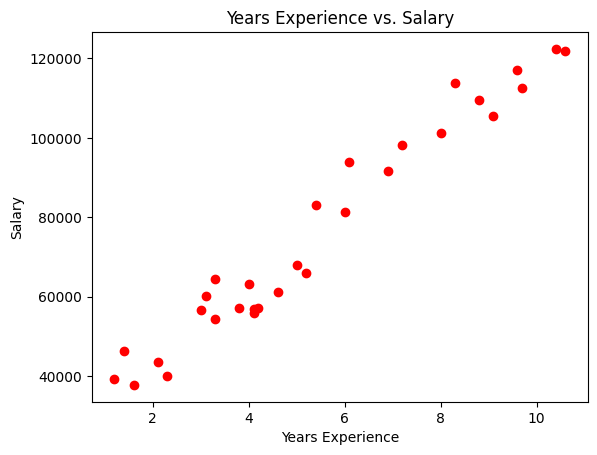

In [131]:
# Create a scatter plot of the data. To change the markers to red "x",
# we used the 'marker' and 'c' parameters
plt.scatter(x_train, y_train, marker='o', c='r')

# Set the title
plt.title("Years Experience vs. Salary")
plt.xlabel('Years Experience')
plt.ylabel('Salary')
plt.show()

In [132]:
# Compute Cost Function

def compute_cost(x, y, w, b):
    """
    Computes the cost function for linear regression.

    Args:
        x (ndarray): Shape (m,) Input to the model (Population of cities)
        y (ndarray): Shape (m,) Label (Actual profits for the cities)
        w, b (scalar): Parameters of the model

    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0]

    # cost
    total_cost = 0

    # cost calculation
    for i in range(m):
        f_wb_x = w * x[i] + b
        err = f_wb_x - y[i]
        total_cost += err ** 2

    total_cost = total_cost / (2*m)

    return total_cost

In [133]:
# Compute cost with some initial values for paramaters w, b
initial_w = 2
initial_b = 1

cost = compute_cost(x_train, y_train, initial_w, initial_b)
print(f'Cost at initial w: {cost:.3f}')


Cost at initial w: 3250507711.545


In [134]:
# Compute Gradient Function
def compute_gradient(x, y, w, b):
    """
    Computes the gradient for linear regression
    Args:
      x (ndarray): Shape (m,) Input to the model (Population of cities)
      y (ndarray): Shape (m,) Label (Actual profits for the cities)
      w, b (scalar): Parameters of the model
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b
     """

    # Number of training examples
    m = x.shape[0]

    # partial derivatives
    dj_dw = 0
    dj_db = 0


    # Computation
    for i in range(m):
        f_wb_x = w * x[i] + b
        err = f_wb_x - y[i]

        dj_dw += err * x[i]
        dj_db += err

    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db

In [135]:
# Compute and display gradient with w initialized to zeroes
initial_w = 0
initial_b = 0

tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, initial_w, initial_b)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)

Gradient at initial w, b (zeros): -485004.41333333333 -76004.0


In [136]:
# Compute and display cost and gradient with non-zero w
test_w = 0.2
test_b = 0.2
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, test_w, test_b)

print('Gradient at test w, b:', tmp_dj_dw, tmp_dj_db)

Gradient at test w, b: -484995.91279999993 -76002.71733333333


In [137]:
# Gradient Descent Function

def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    """
    Performs batch gradient descent to learn theta. Updates theta by taking
    num_iters gradient steps with learning rate alpha

    Args:
      x :    (ndarray): Shape (m,)
      y :    (ndarray): Shape (m,)
      w_in, b_in : (scalar) Initial values of parameters of the model
      cost_function: function to compute cost
      gradient_function: function to compute the gradient
      alpha : (float) Learning rate
      num_iters : (int) number of iterations to run gradient descent
    Returns
      w : (ndarray): Shape (1,) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """

    # number of training examples
    m = len(x)

    # An array to store cost J and w's at each iteration — primarily for graphing later
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in

    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_dw, dj_db = gradient_function(x, y, w, b )

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")

    return w, b, J_history, w_history #return w and J,w history for graphing

In [138]:
# initializing fitting parameters
initial_w = 0.
initial_b = 0.

# some gradient descent settings
# iterations = 15000
# alpha = 0.01

iterations = 2000
alpha = 0.03


w,b,J_history,_ = gradient_descent(x_train ,y_train, initial_w, initial_b,
                     compute_cost, compute_gradient, alpha, iterations)

print("w,b found by gradient descent:", w, b)

Iteration    0: Cost 129593194.27   
Iteration  200: Cost 20244086.73   
Iteration  400: Cost 16023877.52   
Iteration  600: Cost 15668209.34   
Iteration  800: Cost 15638234.55   
Iteration 1000: Cost 15635708.36   
Iteration 1200: Cost 15635495.46   
Iteration 1400: Cost 15635477.51   
Iteration 1600: Cost 15635476.00   
Iteration 1800: Cost 15635475.87   
w,b found by gradient descent: 9449.976652559053 24848.10632131876


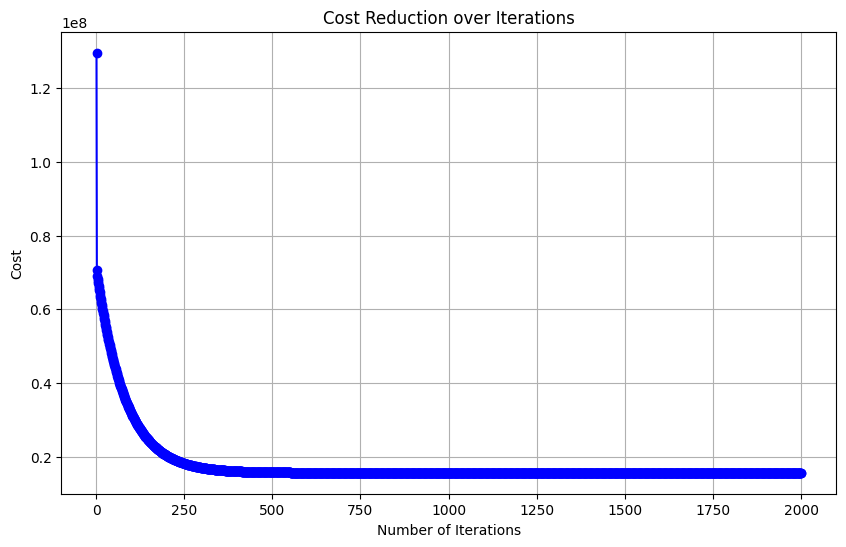

In [139]:
# Cost Reduction over Iterations plot
import matplotlib.pyplot as plt

# Number of iterations
iterations = range(1, len(J_history) + 1)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(iterations, J_history, marker='o', linestyle='-', color='b')
plt.title('Cost Reduction over Iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.grid(True)
plt.show()


In [140]:
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x_train[i] + b

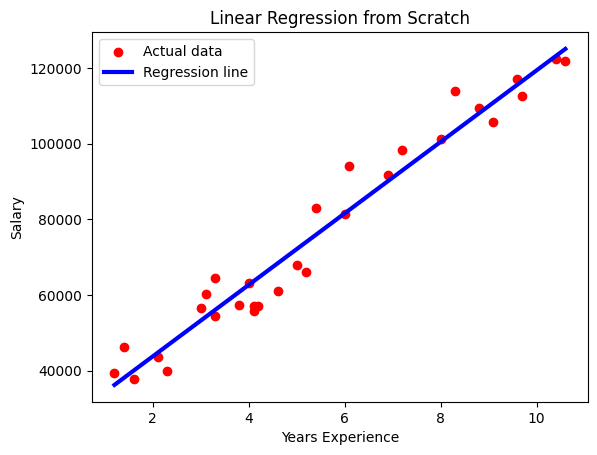

In [141]:
plt.scatter(x_train, y_train, color='red', label='Actual data')
plt.plot(x_train, predicted, color='blue', linewidth=3, label='Regression line')
plt.title('Linear Regression from Scratch')
plt.xlabel('Years Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [142]:
predict1 = 2 * w + b
print('For years experience = 2, predicted salary is ${}'.format(predict1))

For years experience = 2, predicted salary is $43748.059626436865
